# Exploratory Notebook

This notebook will contain initial exploration of the data as well as cleaning and formatting. All data used in this notebook can be found in the data directory. The energy data is found in the data/solar_output directory and weather data in data/weather. 

In [4]:
# Import libraries
import os
import pandas as pd
import numpy as np

Since the energy data was scraped on a daily time frame, I have to read in multiple files into a single dataframe. Below I will create a list of all files from data/solar_output directory to be stored in the energy dataframe. 

In [5]:
filelist = os.listdir('./../data/solar_output')

In [6]:
file_list[0]

NameError: name 'file_list' is not defined

Now that I have all the files stored in the list, I need to add the path to the data directory before I can read these files into a dataframe. I need to add the path to each file name. I will store that in a seperate list, 'fl', which I can utilize to store the files in a dataframe

In [7]:
fl = ['../data/solar_output/' + str(f) for f in filelist]

Now that I have all of the files stored in a list with their respective path's, I can use these files to create a list of dataframes, which I can then concatenate into a single dataframe.

In [8]:
df_list = [pd.read_csv(f) for f in fl]

In [9]:
big_df = pd.concat(df_list)

In [10]:
big_df.head()

,Unnamed: 0,University of Illinois,Unnamed: 2
0,Timestamp,New Nexus 1272 Meter,Inverters
1,NaN,kW,kW
2,3/12/2018 12:00 AM,-8.14,NaN
3,3/12/2018 12:15 AM,-9.14,NaN
4,3/12/2018 12:30 AM,-9.31,NaN


In [11]:
big_df.columns = ['time', 'nexus_meter', 'inverter']

In [12]:
big_df.drop([0,1], axis=0, inplace=True)

In [13]:
big_df['time'] = pd.to_datetime(big_df['time'])

In [14]:
energy_df = big_df.sort_values('time')

In [15]:
energy_df.head()

,time,nexus_meter,inverter
2,2017-12-12 00:00:00,NaN,NaN
3,2017-12-12 00:15:00,NaN,NaN
4,2017-12-12 00:30:00,NaN,NaN
5,2017-12-12 00:45:00,NaN,NaN
6,2017-12-12 01:00:00,NaN,NaN


In [16]:
energy_df2 = energy_df.set_index('time')

In [17]:
hourly = energy_df2.resample('H').sum()

In [18]:
hourly.tail()

,nexus_meter,inverter
time,,
2020-07-20 19:00:00,2.52175e+10,2.77199e+11
2020-07-20 20:00:00,30.2-0.503-15.7-14,52.718.80.0390
2020-07-20 21:00:00,-13.7-13.6-13.6-13.6,0000
2020-07-20 22:00:00,-13.5-13.6-13.7-13.8,0000
2020-07-20 23:00:00,-13.7-13.7-13.7-13.7,0000


In [19]:
energy_df3 = energy_df2[['nexus_meter', 'inverter']].astype(float)

In [20]:
hourly = energy_df3.resample('H').sum()

In [21]:
hourly.shape

(22848, 2)

In [22]:
hourly[:'2018-01-30 15:00:00']

,nexus_meter,inverter
time,,
2017-12-12 00:00:00,0.0,0.0
2017-12-12 01:00:00,0.0,0.0
2017-12-12 02:00:00,0.0,0.0
2017-12-12 03:00:00,0.0,0.0
2017-12-12 04:00:00,0.0,0.0
...,...,...
2018-01-30 11:00:00,10128.0,10162.0
2018-01-30 12:00:00,17570.0,17734.0
2018-01-30 13:00:00,16156.0,16323.0


In [23]:
hourly = hourly['2018-01-30':]

In [24]:
hourly.head(15)

,nexus_meter,inverter
time,,
2018-01-30 00:00:00,0.0,0.00
2018-01-30 01:00:00,0.0,0.00
2018-01-30 02:00:00,0.0,0.00
2018-01-30 03:00:00,0.0,0.00
2018-01-30 04:00:00,0.0,0.00
2018-01-30 05:00:00,0.0,0.00
2018-01-30 06:00:00,0.0,1.08
2018-01-30 07:00:00,0.0,57.50
2018-01-30 08:00:00,0.0,0.00


Great now I have all of my energy data stored in a single dataframe. I will need to do some additional cleaning (night time hours have no energy production). But for now, I want to move on to getting my weather data set up and formatted. I will start by reading in the weatherstation2.csv file from data/weather directory and storing it in a dataframe

In [25]:
weather = pd.read_csv('../data/weather/weatherstation2.csv')

Next i convert the 'DATE' column to a pandas datetime object. This will allow me to resample and structure the time increments as needed.

In [26]:
weather['DATE'] = pd.to_datetime(weather['DATE'])

In [27]:
weather.head()

,STATION,DATE,REPORT_TYPE,SOURCE,AWND,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,...,ShortDurationPrecipitationValue060,ShortDurationPrecipitationValue080,ShortDurationPrecipitationValue100,ShortDurationPrecipitationValue120,ShortDurationPrecipitationValue150,ShortDurationPrecipitationValue180,Sunrise,Sunset,TStorms,WindEquipmentChangeDate
0,72531594870,2018-01-29 00:23:00,FM-16,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-05-10
1,72531594870,2018-01-29 00:42:00,FM-16,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-05-10
2,72531594870,2018-01-29 00:51:00,FM-16,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-05-10
3,72531594870,2018-01-29 00:53:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-05-10
4,72531594870,2018-01-29 01:53:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-05-10


Next I set the index of the weather dataframe as "DATE" so I can use it for time series analysis. I store this dataframe in weather_df

In [28]:
weather_df = weather.set_index('DATE')

In [29]:
weather_df.head()

,STATION,REPORT_TYPE,SOURCE,AWND,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,BackupElevationUnit,...,ShortDurationPrecipitationValue060,ShortDurationPrecipitationValue080,ShortDurationPrecipitationValue100,ShortDurationPrecipitationValue120,ShortDurationPrecipitationValue150,ShortDurationPrecipitationValue180,Sunrise,Sunset,TStorms,WindEquipmentChangeDate
DATE,,,,,,,,,,,,,,,,,,,,,
2018-01-29 00:23:00,72531594870,FM-16,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-05-10
2018-01-29 00:42:00,72531594870,FM-16,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-05-10
2018-01-29 00:51:00,72531594870,FM-16,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-05-10
2018-01-29 00:53:00,72531594870,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-05-10
2018-01-29 01:53:00,72531594870,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-05-10


There are only a few columns in the dataframe that actually contain data and therefore are the only ones that are useful for my analysis. I gathered the names of those columns from the dataframe and store the column names in 'weather_cols'. I will then use this list to subset the dataframe to contain only the features useful.

In [30]:
weather_cols = ['REPORT_TYPE', 'SOURCE', 'HourlyAltimeterSetting', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature', 'HourlyPrecipitation', 'HourlyRelativeHumidity',
'HourlySeaLevelPressure', 'HourlySkyConditions', 'HourlyStationPressure', 'HourlyVisibility', 'HourlyWetBulbTemperature', 'HourlyWindDirection', 'HourlyWindSpeed', 'REM']

In [31]:
weather_df = weather_df[weather_cols]

In [32]:
weather_df.head()

,REPORT_TYPE,SOURCE,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlySkyConditions,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,REM
DATE,,,,,,,,,,,,,,,
2018-01-29 00:23:00,FM-16,7,30.34,28,30,NaN,92,NaN,SCT:04 8 OVC:08 75,29.51,5.00,29,330,14,MET09701/29/18 00:23:02 SPECI KCMI 290623Z 330...
2018-01-29 00:42:00,FM-16,7,30.35,28,30,NaN,92,NaN,BKN:07 10 BKN:07 70 OVC:08 80,29.52,6.00,29,320,13,MET10401/29/18 00:42:02 SPECI KCMI 290642Z 320...
2018-01-29 00:51:00,FM-16,6,30.34,28,30,NaN,93,NaN,OVC:08 9,29.51,6.00,29,330,15,MET08501/29/18 00:51:02 SPECI KCMI 290651Z 330...
2018-01-29 00:53:00,FM-15,7,30.34,28,30,0.00,92,30.36,OVC:08 9,29.51,6.00,29,330,15,MET09701/29/18 00:53:02 METAR KCMI 290653Z 330...
2018-01-29 01:53:00,FM-15,7,30.34,28,30,T,92,30.35,OVC:08 9,29.51,3.00,29,340,10,MET11301/29/18 01:53:02 METAR KCMI 290753Z 340...


Now I have all of the columns I want in a dataframe. Now I can check for missing values and begin exploring the data.

In [33]:
weather_df.isna().sum()

REPORT_TYPE                     0
SOURCE                          0
HourlyAltimeterSetting        939
HourlyDewPointTemperature    1015
HourlyDryBulbTemperature      934
HourlyPrecipitation          5714
HourlyRelativeHumidity       1015
HourlySeaLevelPressure       8449
HourlySkyConditions          1018
HourlyStationPressure        1026
HourlyVisibility              937
HourlyWetBulbTemperature     1102
HourlyWindDirection          1017
HourlyWindSpeed              1019
REM                             0
dtype: int64

In [34]:
weather_df.dtypes

REPORT_TYPE                  object
SOURCE                        int64
HourlyAltimeterSetting       object
HourlyDewPointTemperature    object
HourlyDryBulbTemperature     object
HourlyPrecipitation          object
HourlyRelativeHumidity       object
HourlySeaLevelPressure       object
HourlySkyConditions          object
HourlyStationPressure        object
HourlyVisibility             object
HourlyWetBulbTemperature     object
HourlyWindDirection          object
HourlyWindSpeed              object
REM                          object
dtype: object

Even though the majority of columns primarily have numeric values, all of the columns (excluding source) are stored as object. The reason for this is there are a few strings located in this columns throughout the dataframe.

In [35]:
weather_df['HourlyPrecipitation'].value_counts()

0.00     18638
T         2788
0.01       804
0.02       409
0.03       259
         ...  
0.87         1
0.82s        1
1.09         1
0.81         1
0.94         1
Name: HourlyPrecipitation, Length: 113, dtype: int64

You can see an example above. The hourly precipitation is usally a numeric value, however the string 'T' is scattered throughout the values. This indicates "trace amounts of precipitation". The values are in inches of precipitation in the given time period. I think it is safe to assume that "trace amounts" could be categorized as no precipitation (value of 0). So I am going to go through and all values of 'T' will be replaced with 0. I also see that a few values have an 's' tagged onto the end. There is no discussion of this in the data documentation, so I am going to assume these are typos and I will remove 's' from any observations it is present in.

In [36]:
weather_df['HourlyPrecipitation'] = ['0.00' if val == 'T' else val for val in weather_df['HourlyPrecipitation']]

In [37]:
weather_df['HourlyPrecipitation'].value_counts()

0.00     21426
0.01       804
0.02       409
0.03       259
0.04       200
         ...  
0.87         1
0.82s        1
1.09         1
0.81         1
0.94         1
Name: HourlyPrecipitation, Length: 112, dtype: int64

Now all values of 'T' are stored as 0. Now I want to remove 's' from any values it is present in.

In [38]:
weather_df['HourlyPrecipitation'].value_counts()

0.00     21426
0.01       804
0.02       409
0.03       259
0.04       200
         ...  
0.87         1
0.82s        1
1.09         1
0.81         1
0.94         1
Name: HourlyPrecipitation, Length: 112, dtype: int64

In [39]:
precip = []
for val in weather_df['HourlyPrecipitation'].values:
    if 's' in str(val):
        precip.append(val.replace('s', ''))
    else:
        precip.append(val)

In [40]:
weather_df['HourlyPrecipitation'] = precip

In [41]:
weather_df['HourlyPrecipitation'].value_counts()

0.00    21426
0.01      807
0.02      412
0.03      266
0.04      200
        ...  
0.78        1
2.13        1
0.62        1
0.80        1
0.56        1
Name: HourlyPrecipitation, Length: 96, dtype: int64

Great now all of the 's' occurences are removed. Before I can fill in the missing values I need to explore and format the other values as I did this one. So I will go through each column and make sure all values make sense and are in the same format

In [42]:
weather_df['HourlyAltimeterSetting'].value_counts()

29.99    585
29.98    551
29.97    541
30.02    540
29.96    537
        ... 
30.85      1
29.31      1
30.79      1
29.47      1
30.7       1
Name: HourlyAltimeterSetting, Length: 287, dtype: int64

Similar to the precipitation data, 'HourlyAltimeterSetting' also has 's' in a few of it's values. I will do the same thing as before and remove the 's' from all values it is present in.

In [43]:
altmeter = []
for val in weather_df['HourlyAltimeterSetting'].values:
    if 's' in str(val):
        altmeter.append(val.replace('s', ''))
    else:
        altmeter.append(val)

In [44]:
weather_df['HourlyAltimeterSetting'] = altmeter

In [45]:
weather_df['HourlyAltimeterSetting'].value_counts()

29.99    585
29.98    551
29.97    541
30.02    540
29.96    537
        ... 
30.85      1
30.72      1
30.7       1
29.47      1
30.76      1
Name: HourlyAltimeterSetting, Length: 284, dtype: int64

'HourlyAltimeterSetting' is now formatted properly. Next I will look at 'HourlyDewPointTemperature'

In [46]:
weather_df['HourlyDewPointTemperature'].value_counts()

70       503
32.0     491
30.0     491
31.0     452
28.0     450
        ... 
-8.0       1
-13.0      1
79.0       1
-18.0      1
-26.0      1
Name: HourlyDewPointTemperature, Length: 199, dtype: int64

This column seems to be alright, so I will leave it for now and fix it if a problem occurs later on.

In [47]:
weather_df['HourlyDryBulbTemperature'].value_counts()

32     797
33     687
34     643
70     638
31     627
      ... 
44s      1
-16      1
68s      1
96       1
20s      1
Name: HourlyDryBulbTemperature, Length: 122, dtype: int64

Once again 's' is present in some values, so I need to take care of that. Instead of continuosly writing a for loop to do this, I am going to write a function that takes care of this for me.

In [48]:
def remove_s(df, col):
    lst = []
    for val in df[col].values:
        if 's' in str(val):
            lst.append(val.replace('s', ''))
        else:
            lst.append(val)
    return lst

In [49]:
weather_df['HourlyDryBulbTemperature'] = remove_s(weather_df, 'HourlyDryBulbTemperature')

In [50]:
weather_df['HourlyDryBulbTemperature'].value_counts()

32     797
33     687
34     643
70     640
31     633
      ... 
-11      2
-16      1
-14      1
97       1
96       1
Name: HourlyDryBulbTemperature, Length: 114, dtype: int64

Function works as planned, now I can use that for similar occurences.

In [51]:
weather_df['HourlyRelativeHumidity'].value_counts()

100      1712
100.0    1561
96.0     1392
93.0     1195
96       1004
         ... 
15          2
17.0        2
21.0        1
19.0        1
16.0        1
Name: HourlyRelativeHumidity, Length: 168, dtype: int64

This one seems to be okay. Instead of going through each column individually, I am going to create a loop that goes through and find's if 's' is present in any of the values of a given column, if it is, it add's the column name to a list.

In [52]:
columns_with_s = []
for col in weather_cols:
    values = weather_df[col].value_counts().index
    for value in values:
        if 's' in values:
            columns_with_s.append(col)
            

In [53]:
columns_with_s

[]

That list turned out empty so i think it is safe to assume that the rest of the columns don't have this problem. There are a few other irregular occurences I need to take care of however. For example, the '*' symbol seems to be present in a few columns. So I need to take care of that. The documentation says that this value means that "Amounts included in following measurement; time distribution unknown". I believe this means that this measurement is simply added to the next time index. If this is the case, I could simply drop these columns, but I need to be sure about this.

In [54]:
weather_df[weather_df['HourlyWetBulbTemperature'] == '*']

,REPORT_TYPE,SOURCE,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlySkyConditions,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,REM
DATE,,,,,,,,,,,,,,,
2018-03-28 10:53:00,FM-15,7,29.96,*,*,0.00,*,NaN,OVC:08 8,29.14,5.00,*,060,5,MET09203/28/18 10:53:02 METAR KCMI 281653Z 060...
2020-06-23 11:53:00,FM-15,7,29.85,*,*,0.00,*,NaN,FEW:02 45,29.03,10.00,*,310,17,MET07206/23/20 11:53:02 METAR KCMI 231753Z 310...
2020-06-24 11:58:00,FM-15,7,29.93,*,*,0.00,*,NaN,FEW:02 49 SCT:04 65,29.11,10.00,*,000,0,MET07906/24/20 11:58:02 METAR KCMI 241758Z 000...


So there are only four columns that ever contain the value '*' and they are all for the same time indices. I am going to return to this problem shortly. Now I want to focus on the 'HourlySkyConditions' column which is pretty much the only true categorical column. I need to do one of two things. I can either summarize these values as one of four cloud coverage values (clear, slightly cloudy, partly cloudy, overcast) or I can make the value numeric as percentage of sky covered. I am going to start with the latter and try and calculate the cloud coverage as a percentage.

The 'HourlySkyConditions' column contains nan values which are stored as floats, the other values are stored as strings. The documentation says there can be up to three cloud layers included in this column. When trying to get the overall cloud coverage and multiple cloud layers are listed, it says to use the last one. The format of the column is as follows (coverage code: amount of 'oktas', and cloud base height). I want the amount of oktas for the last value of each observation, this gives amount of sky covered by clouds and can be used to calculate cloud coverage percentage.

In [55]:
clouds = []
for val in weather_df['HourlySkyConditions'].values:
    if type(val) == float:
        clouds.append(val)
    elif type(val) == str:
        v = val.split()
        if len(v) == 1:
            clouds.append(int(v[0][-1]))
        elif len(v) > 1:
            try:
                clouds.append(int(v[-2][-1]))
            except:
                clouds.append(int(v[-1][-1]))

In [56]:
cloud_percent = [v if v==np.nan else ((v/10) * 100) for v in clouds]

In [57]:
weather_df['cloud_coverage'] = cloud_percent

In [58]:
weather_df.head(5)

,REPORT_TYPE,SOURCE,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlySkyConditions,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,REM,cloud_coverage
DATE,,,,,,,,,,,,,,,,
2018-01-29 00:23:00,FM-16,7,30.34,28,30,NaN,92,NaN,SCT:04 8 OVC:08 75,29.51,5.00,29,330,14,MET09701/29/18 00:23:02 SPECI KCMI 290623Z 330...,80.0
2018-01-29 00:42:00,FM-16,7,30.35,28,30,NaN,92,NaN,BKN:07 10 BKN:07 70 OVC:08 80,29.52,6.00,29,320,13,MET10401/29/18 00:42:02 SPECI KCMI 290642Z 320...,80.0
2018-01-29 00:51:00,FM-16,6,30.34,28,30,NaN,93,NaN,OVC:08 9,29.51,6.00,29,330,15,MET08501/29/18 00:51:02 SPECI KCMI 290651Z 330...,80.0
2018-01-29 00:53:00,FM-15,7,30.34,28,30,0.00,92,30.36,OVC:08 9,29.51,6.00,29,330,15,MET09701/29/18 00:53:02 METAR KCMI 290653Z 330...,80.0
2018-01-29 01:53:00,FM-15,7,30.34,28,30,0.00,92,30.35,OVC:08 9,29.51,3.00,29,340,10,MET11301/29/18 01:53:02 METAR KCMI 290753Z 340...,80.0


Now that I have cloud coverage calculated, I can select the columns that actually give information.

In [59]:
w_cols = ['HourlyAltimeterSetting', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature', 'HourlyRelativeHumidity', 'HourlySeaLevelPressure',
'HourlyStationPressure', 'HourlyVisibility', 'HourlyWetBulbTemperature', 'HourlyWindSpeed', 'cloud_coverage']

In [60]:
w_df = weather_df[w_cols]

In [61]:
w_df.head()

,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindSpeed,cloud_coverage
DATE,,,,,,,,,,
2018-01-29 00:23:00,30.34,28,30,92,NaN,29.51,5.00,29,14,80.0
2018-01-29 00:42:00,30.35,28,30,92,NaN,29.52,6.00,29,13,80.0
2018-01-29 00:51:00,30.34,28,30,93,NaN,29.51,6.00,29,15,80.0
2018-01-29 00:53:00,30.34,28,30,92,30.36,29.51,6.00,29,15,80.0
2018-01-29 01:53:00,30.34,28,30,92,30.35,29.51,3.00,29,10,80.0


Okay there are still two problems I need to address: missing values and the time index frequency. After talking with one of my instructors, these are both things I need to experiment with and see what gives me the best results for my models. For now however, just until I get an MVP done, I am going to average all observations within a given hour and see if I still need to impute any missing values from there. First I need to convert all column types to numeric. For the time being I am also going to drop the rows that have a '*' for any values.

In [62]:
to_drop = weather_df[weather_df['HourlyRelativeHumidity'] == '*'].index

In [63]:
w_df.drop(to_drop, axis=0, inplace=True)

Now that that is taken care of, I can covert all of the columns to numeric. This will allow me to group together the rows into hourly observations.

In [64]:
for col in w_cols:
    try:
        w_df[col] = w_df[col].astype(float)
    except:
        print(col)

HourlySeaLevelPressure
HourlyStationPressure
HourlyVisibility
HourlyWindSpeed


So the five columns above still have 's' in some of their values. After I take care of that I should be able to convert them to numeric.

In [65]:
w_df['HourlySeaLevelPressure'] = remove_s(w_df, 'HourlySeaLevelPressure')
w_df['HourlyStationPressure'] = remove_s(w_df, 'HourlyStationPressure')
w_df['HourlyVisibility'] = remove_s(w_df, 'HourlyVisibility')
w_df['HourlyWindSpeed'] = remove_s(w_df, 'HourlyWindSpeed')

In [66]:
for col in w_cols:
    try:
        w_df[col] = w_df[col].astype(float)
    except:
        print(col)

HourlyVisibility


These two seem to have a "V" in a few of the values, I am going to rewrite the function from earlier, this time allowing the value to be removed to be passed in as an argument.

In [67]:
def remove_value(df, col, value):
    lst = []
    for val in df[col].values:
        if value in str(val):
            lst.append(val.replace(value, ''))
        else:
            lst.append(val)
    return lst

In [68]:
w_df['HourlyVisibility'] = remove_value(w_df, 'HourlyVisibility', 'V')

In [69]:
for col in w_cols:
    try:
        w_df[col] = w_df[col].astype(float)
    except:
        print(col)

HourlyVisibility


It seems 'HourlyVisibility' also has some '*' values. I will drop those from w_df now

In [70]:
to_drop2 = w_df[w_df['HourlyVisibility'] == '*'].index

In [71]:
w_df.drop(to_drop2, axis=0, inplace=True)

In [72]:
for col in w_cols:
    w_df[col] = w_df[col].astype(float)

In [73]:
w_df.dtypes

HourlyAltimeterSetting       float64
HourlyDewPointTemperature    float64
HourlyDryBulbTemperature     float64
HourlyRelativeHumidity       float64
HourlySeaLevelPressure       float64
HourlyStationPressure        float64
HourlyVisibility             float64
HourlyWetBulbTemperature     float64
HourlyWindSpeed              float64
cloud_coverage               float64
dtype: object

Now I can aggregate the indices for one hour taking the mean of all observations within that hour.

In [74]:
weather_hourly = w_df.resample('H').mean()

In [75]:
weather_hourly.isna().sum()

HourlyAltimeterSetting        14
HourlyDewPointTemperature     58
HourlyDryBulbTemperature      13
HourlyRelativeHumidity        58
HourlySeaLevelPressure        24
HourlyStationPressure         71
HourlyVisibility              14
HourlyWetBulbTemperature     110
HourlyWindSpeed               76
cloud_coverage                72
dtype: int64

I was hoping that would take care of the missing values but some are still present. That means that there were some hours were no observations were reported. I want to see the time frames this was occuring, if it was occuring at hours where no energy would be generated (night), I am going to ignore those values anyways so it shouldn't be a problem.

In [76]:
df = pd.concat([hourly, weather_hourly], axis=1)

In [77]:
df.tail(10)

,nexus_meter,inverter,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindSpeed,cloud_coverage
DATE,,,,,,,,,,,,
2020-07-20 14:00:00,13269.000,13560.000,30.01,69.0,84.0,61.0,29.99,29.19,10.0,74.0,7.0,20.0
2020-07-20 15:00:00,12480.000,12718.000,30.01,67.0,83.0,59.0,29.99,29.19,10.0,72.0,0.0,0.0
2020-07-20 16:00:00,8412.000,8516.000,30.00,67.0,83.0,59.0,29.98,29.18,10.0,72.0,6.0,0.0
2020-07-20 17:00:00,7061.000,7246.000,29.99,68.0,79.0,69.0,29.97,29.17,10.0,72.0,6.0,0.0
2020-07-20 18:00:00,2684.000,2797.000,29.99,67.0,78.0,69.0,29.98,29.17,10.0,71.0,6.0,0.0
2020-07-20 19:00:00,625.100,723.000,30.01,68.0,75.0,79.0,29.99,29.19,10.0,70.0,3.0,0.0
2020-07-20 20:00:00,-0.003,71.539,30.02,69.0,73.0,87.0,30.00,29.20,10.0,70.0,3.0,0.0
2020-07-20 21:00:00,-54.500,0.000,30.04,69.0,72.0,91.0,30.02,29.22,10.0,70.0,0.0,0.0
2020-07-20 22:00:00,-54.600,0.000,30.04,68.0,71.0,90.0,30.02,29.22,10.0,69.0,0.0,0.0


Awesome now I have one big dataframe with the weather conditions and energy output at each hour. The dataframe spans from January 29, 2018 to July 20, 2020. Now I can begin exploring the data with this current dataframe I have.

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
df.corr()

,nexus_meter,inverter,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindSpeed,cloud_coverage
nexus_meter,1.000000,0.983593,0.043478,0.137505,0.394249,-0.683752,0.024857,0.043754,0.246685,0.268081,0.122774,-0.190532
inverter,0.983593,1.000000,0.035830,0.146890,0.398156,-0.668699,0.016747,0.036099,0.241070,0.273732,0.116465,-0.186083
HourlyAltimeterSetting,0.043478,0.035830,1.000000,-0.435791,-0.369664,-0.146621,0.996606,0.999902,0.110607,-0.410070,-0.225142,-0.209996
HourlyDewPointTemperature,0.137505,0.146890,-0.435791,1.000000,0.925439,0.083335,-0.500612,-0.436110,0.067361,0.979680,-0.229555,-0.072182
HourlyDryBulbTemperature,0.394249,0.398156,-0.369664,0.925439,1.000000,-0.293265,-0.437464,-0.370165,0.217518,0.980516,-0.152838,-0.184591
HourlyRelativeHumidity,-0.683752,-0.668699,-0.146621,0.083335,-0.293265,1.000000,-0.131009,-0.146274,-0.477629,-0.109282,-0.183543,0.326387
HourlySeaLevelPressure,0.024857,0.016747,0.996606,-0.500612,-0.437464,-0.131009,1.000000,0.996510,0.091387,-0.477809,-0.199106,-0.186235
HourlyStationPressure,0.043754,0.036099,0.999902,-0.436110,-0.370165,-0.146274,0.996510,1.000000,0.109122,-0.410187,-0.224820,-0.209775
HourlyVisibility,0.246685,0.241070,0.110607,0.067361,0.217518,-0.477629,0.091387,0.109122,1.000000,0.149927,0.009741,-0.385113
HourlyWetBulbTemperature,0.268081,0.273732,-0.410070,0.979680,0.980516,-0.109282,-0.477809,-0.410187,0.149927,1.000000,-0.194544,-0.133133


DryBulbTemperature is the primary measure of temperature and largely correlated with WetBulbTemperature. For that reason i am going to drop WetBulbTemperature

In [80]:
df.drop('HourlyWetBulbTemperature', axis=1, inplace=True)

The feature that correlates most with energy production (nexus_meter) seems to be HourlyDryBulbTemperature, which is the air temperature at time of observation. 

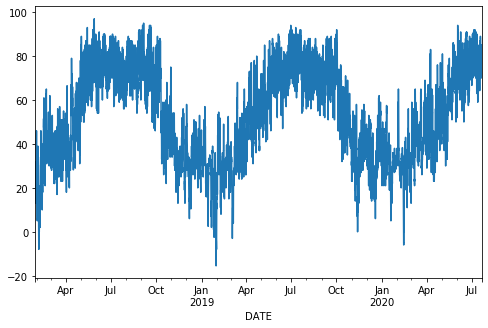

In [82]:
df['HourlyDryBulbTemperature'].plot(figsize=(8, 5))

As one would expect, temperature fluctuates with the time of year which can be seen from the overall trend of the plot. It also fluctuates with time of day as you can see from the little deviations throughout the time series.

For my MVP, I want to use weather conditions to predict energy output three hours in the future. In order to utilize traditional machine learning models, I need to structure the dataframe in a way that reflects this. So for a given row, the weather observations will be a three hour time lag compared to the energy output. I want to format a dataframe in this way, then i can begin working on an FSM.

In [86]:
weather_hourly['time'] = weather_hourly.index

In [88]:
df2 = pd.concat([hourly, weather_hourly.shift(3)], axis=1)

In [92]:
df.head(24)

,nexus_meter,inverter,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWindSpeed,cloud_coverage
DATE,,,,,,,,,,,
2018-01-29 00:00:00,NaN,NaN,30.342500,28.000000,30.000000,92.25,30.36,29.512500,5.750000,14.250000,80.0
2018-01-29 01:00:00,NaN,NaN,30.340000,28.000000,30.000000,92.00,30.35,29.510000,3.000000,10.000000,80.0
2018-01-29 02:00:00,NaN,NaN,30.330000,28.000000,30.000000,92.00,30.34,29.500000,5.000000,13.000000,80.0
2018-01-29 03:00:00,NaN,NaN,30.330000,28.000000,30.000000,92.00,30.34,29.500000,6.000000,13.000000,80.0
2018-01-29 04:00:00,NaN,NaN,30.330000,28.000000,30.000000,92.50,30.35,29.500000,6.000000,10.500000,80.0
2018-01-29 05:00:00,NaN,NaN,30.340000,27.000000,30.000000,88.00,30.37,29.510000,10.000000,14.000000,80.0
2018-01-29 06:00:00,NaN,NaN,30.360000,26.000000,29.000000,89.00,30.38,29.530000,5.000000,16.000000,80.0
2018-01-29 07:00:00,NaN,NaN,30.370000,25.000000,28.250000,86.75,30.39,29.540000,9.000000,14.500000,80.0
2018-01-29 08:00:00,NaN,NaN,30.373333,24.000000,28.000000,85.00,30.41,29.543333,9.666667,17.000000,80.0


The first 24 obvservations in the dataframe do not contain energy data, so I will drop those rows.

In [94]:
df2.drop(df[:24].index, axis=0, inplace=True)

In [98]:
df2.head(24)

,nexus_meter,inverter,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindSpeed,cloud_coverage,time
DATE,,,,,,,,,,,,,
2018-01-30 00:00:00,0.000,0.00,30.47,15.0,19.0,84.0,30.51,29.64,10.0,18.0,6.0,0.0,2018-01-29 21:00:00
2018-01-30 01:00:00,0.000,0.00,30.48,13.0,17.0,84.0,30.52,29.65,10.0,16.0,6.0,0.0,2018-01-29 22:00:00
2018-01-30 02:00:00,0.000,0.00,30.48,13.0,17.0,84.0,30.51,29.65,10.0,16.0,5.0,0.0,2018-01-29 23:00:00
2018-01-30 03:00:00,0.000,0.00,30.46,14.0,17.0,88.0,30.50,29.63,10.0,16.0,6.0,0.0,2018-01-30 00:00:00
2018-01-30 04:00:00,0.000,0.00,30.47,11.0,15.0,84.0,30.50,29.64,10.0,14.0,6.0,0.0,2018-01-30 01:00:00
2018-01-30 05:00:00,0.000,0.00,30.47,11.0,14.0,88.0,30.50,29.64,10.0,13.0,5.0,0.0,2018-01-30 02:00:00
2018-01-30 06:00:00,0.000,1.08,30.46,11.0,14.0,88.0,30.49,29.63,10.0,13.0,5.0,0.0,2018-01-30 03:00:00
2018-01-30 07:00:00,0.000,57.50,30.45,10.0,13.0,88.0,30.49,29.62,10.0,12.0,0.0,0.0,2018-01-30 04:00:00
2018-01-30 08:00:00,0.000,0.00,30.47,11.0,14.0,88.0,30.51,29.64,10.0,13.0,6.0,0.0,2018-01-30 05:00:00


Perfect, now the energy output of each row corresponds to the weather observations three hours prior. Now that I know how to do this, I want to create a few functions that do the initial cleaning and formatting of the dataframes for me, so i can replicate the process above in other notebooks. The first one I want to create is a function that read's in all of the energy data files from the data/solar_output directory. 

In [197]:
def energy_data():
    filelist = os.listdir('../data/solar_output')

    fl = ['../data/solar_output/' + str(f) for f in filelist]

    dfs = [pd.read_csv(f) for f in fl]

    big_df = pd.concat(dfs)

    big_df.columns = ['time', 'nexus_meter', 'inverter']

    big_df.drop([0,1], axis=0, inplace=True)

    big_df['time'] = pd.to_datetime(big_df['time'])

    big_df = big_df.sort_values('time')
    big_df.set_index('time', inplace=True)

    hourly = big_df.resample('H').sum()

    hourly = hourly['2018-01-30':]

    return hourly

The function above returns the hourly energy data in the correct format. It also subset for the dates that contained no data in early January of 2018. I leave a day of missing data to account for the time shift of weather data when merging the dataframes. The next funcion read's in the weather data and get's the first few columns. The subsequent functions will serve as processing steps for the weather dataframe

In [189]:
def weather_data():
    weather_cols = ['HourlyAltimeterSetting', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature',
    'HourlyRelativeHumidity', 'HourlySeaLevelPressure', 'HourlySkyConditions', 'HourlyStationPressure', 
    'HourlyVisibility', 'HourlyWindSpeed']
    df = pd.read_csv('../data/weather/weatherstation2.csv')

    df['DATE'] = pd.to_datetime(df['DATE'])
    df.set_index('DATE', inplace=True)

    cols_with_letter = columns_with_letter(df[weather_cols])

    for col in cols_with_letter:
        letter = letter_in_column(df[col])
        df[col] = remove_letter_from_column(df, col, value)

    df['cloud_coverage'] = cloud_coverage(df['HourlySkyConditions'])
    weather_cols.append('cloud_coverage')
    return df[weather_cols].drop('HourlySkyConditions', axis=1)



In [190]:
import string

In [191]:
def columns_with_letter(df):
    alph = string.ascii_lowercase
    cols = []
    for col in df.columns:
        for row in df[col].values:
            try:
                if row[-1].lower() in alph:
                    cols.append(col)
            except:
                pass
    return np.unique(cols)

In [192]:
def letter_in_column(col):
    alph = string.ascii_lowercase
    val = None
    for row in col.values:
        try:
            if row[-1].lower() in alph:
                val = row[-1]
        except:
            pass
    return val

In [193]:
def remove_letter_from_column(df, col, letter):
    lst = []
    for val in df[col].values:
        if letter in str(val):
            lst.append(val.replace(letter, ''))
        else:
            lst.append(val)
    return lst

In [194]:
def cloud_coverage(sky_conditions):
    clouds = []
    for val in sky_conditions.values:
        if type(val) == float:
            clouds.append(val)
        elif type(val) == str:
            v = val.split()
            if len(v) == 1:
                clouds.append(int(v[0][-1]))
            elif len(v) > 1:
                try:
                    clouds.append(int(v[-2][-1]))
                except:
                    clouds.append(int(v[-1][-1]))

    cloud_percent = [v if v==np.nan else ((v/10) * 100) for v in clouds]

    return cloud_percent

In [195]:
weather_function = weather_data()

In [196]:
weather_function.head()

,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWindSpeed,cloud_coverage
DATE,,,,,,,,,
2018-01-29 00:23:00,30.34,28,30,92,NaN,29.51,5.00,14,80.0
2018-01-29 00:42:00,30.35,28,30,92,NaN,29.52,6.00,13,80.0
2018-01-29 00:51:00,30.34,28,30,93,NaN,29.51,6.00,15,80.0
2018-01-29 00:53:00,30.34,28,30,92,30.36,29.51,6.00,15,80.0
2018-01-29 01:53:00,30.34,28,30,92,30.35,29.51,3.00,10,80.0


## Functions summary
- energy_data -> stores all energy files from data/solar_output directory in a single dataframe. Formats columns and set's index as date
- columns_with_letter -> finds all columns in weather dataframe that contain extraneous letters
- letter_in_column -> finds extraneous letter in column
- remove_letter_from_column -> removes all instances of extraneous letter from column in dataframe
- cloud_coverage -> calculates cloud coverage percentage from 'HourlySkyConditions' information
- weather_data -> reads in weather station file from data/weather. Uses subsequent functions to format and process columns.
The function that formats the weater dataframe is missing a few functionalities for a reason. I left the '*' values alone because I want to look into those more before I drop them from the dataframe permanently. I did not aggregate the time index to hourly or fill in missing values because I want to be able to experiment with various methods of doing that during model iterations. These functions provide the base dataframe for both hourly and weather data which I can manipulate and format how I see fit during modeling.